In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, balanced_accuracy_score,
    confusion_matrix, cohen_kappa_score, mean_absolute_error, mean_squared_error
)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score


In [37]:
df = pd.read_csv('breast-cancer.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [39]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [40]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [41]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['red','blue'])

In [42]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['red','blue'])


In [43]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['red','blue'])


In [44]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['red','blue'])


In [45]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['red','blue'])


In [46]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['red','blue'])


In [47]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['red','blue'])


In [48]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['red','blue'])


In [49]:
df.drop('id', axis=1, inplace=True) 

In [50]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [51]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
corr = df.corr()

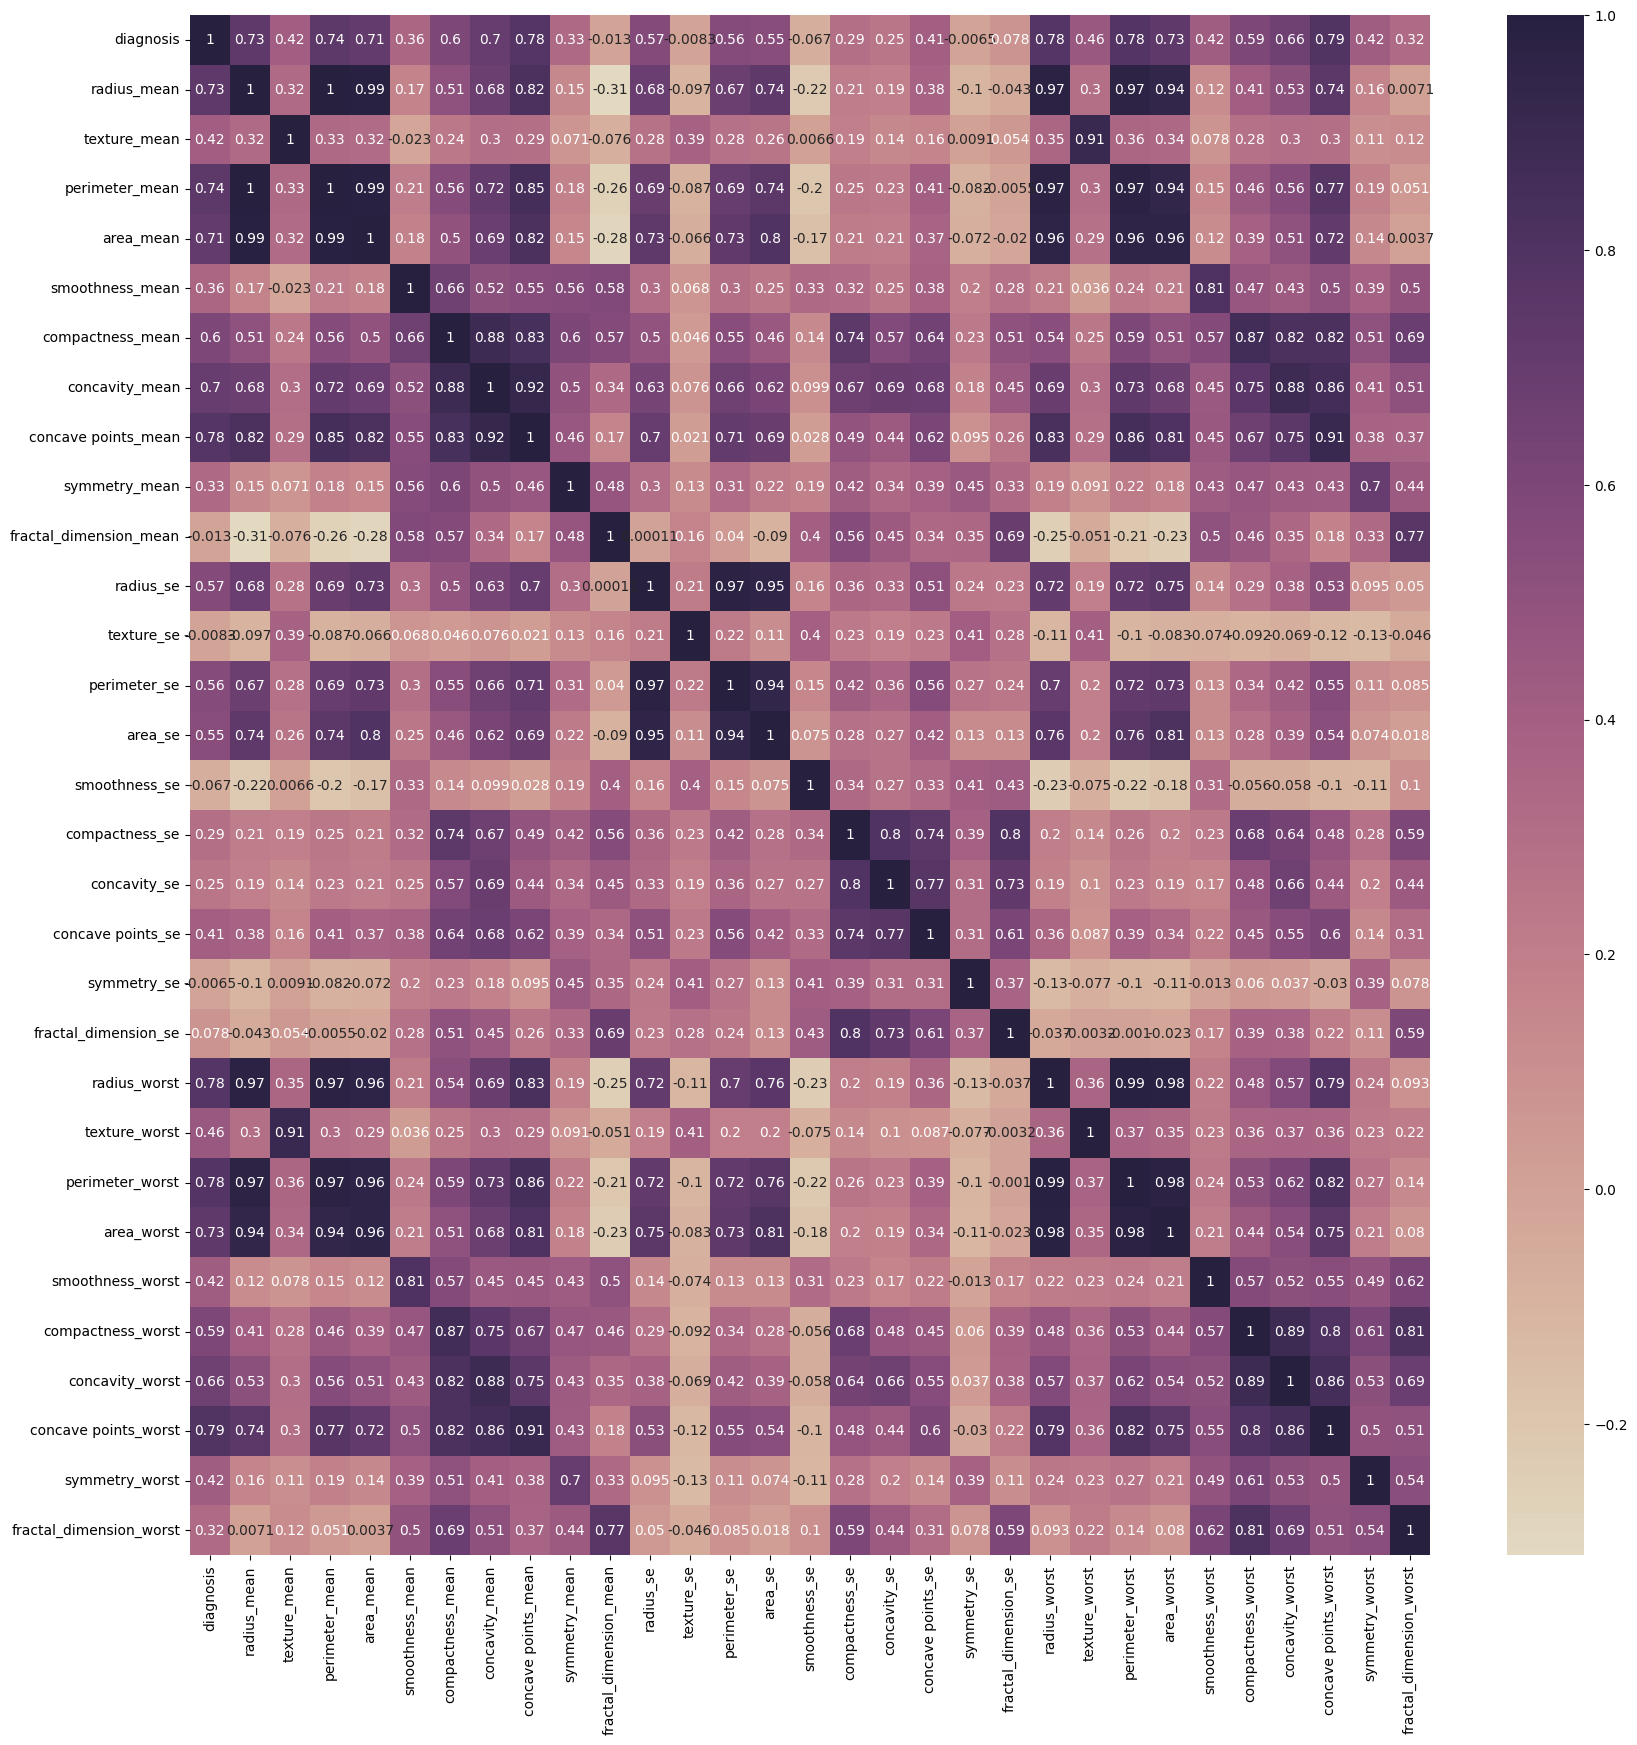

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (threshold = 0.2)
relevant_features = cor_target[cor_target > 0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')


In [54]:
X = df[names]
y = df['diagnosis']

In [55]:
# Split the data into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into validation and test (10% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create an instance of StandardScaler and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform all datasets using the scaler
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [56]:
def train_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Calculate predictions on the validation and test sets
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)

    # Compute metrics for validation set
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    val_precision = precision_score(y_val, val_predictions, average='weighted')
    val_recall = recall_score(y_val, val_predictions, average='weighted')
    val_balanced_accuracy = balanced_accuracy_score(y_val, val_predictions)
    val_kappa = cohen_kappa_score(y_val, val_predictions)
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_relative_absolute_error = val_mae / np.mean(np.abs(y_val - np.mean(y_val)))
    val_root_relative_squared_error = val_rmse / np.sqrt(np.mean((y_val - np.mean(y_val)) ** 2))
    val_tn, val_fp, val_fn, val_tp = confusion_matrix(y_val, val_predictions).ravel()
    val_correctly_classified = val_tp + val_tn
    val_incorrectly_classified = val_fp + val_fn

    # Compute metrics for test set
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_precision = precision_score(y_test, test_predictions, average='weighted')
    test_recall = recall_score(y_test, test_predictions, average='weighted')
    test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
    test_kappa = cohen_kappa_score(y_test, test_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_relative_absolute_error = test_mae / np.mean(np.abs(y_test - np.mean(y_test)))
    test_root_relative_squared_error = test_rmse / np.sqrt(np.mean((y_test - np.mean(y_test)) ** 2))
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, test_predictions).ravel()
    test_correctly_classified = test_tp + test_tn
    test_incorrectly_classified = test_fp + test_fn

    # Create a dataframe to visualize the results
    eval_df = pd.DataFrame({
        'val_accuracy': [val_accuracy],
        'val_f1_score': [val_f1],
        'val_precision': [val_precision],
        'val_recall': [val_recall],
        'val_balanced_accuracy': [val_balanced_accuracy],
        'val_kappa_statistic': [val_kappa],
        'val_mean_absolute_error': [val_mae],
        'val_root_mean_squared_error': [val_rmse],
        'val_relative_absolute_error': [val_relative_absolute_error],
        'val_root_relative_squared_error': [val_root_relative_squared_error],
        'val_correctly_classified_instances': [val_correctly_classified],
        'val_incorrectly_classified_instances': [val_incorrectly_classified],
        'test_accuracy': [test_accuracy],
        'test_f1_score': [test_f1],
        'test_precision': [test_precision],
        'test_recall': [test_recall],
        'test_balanced_accuracy': [test_balanced_accuracy],
        'test_kappa_statistic': [test_kappa],
        'test_mean_absolute_error': [test_mae],
        'test_root_mean_squared_error': [test_rmse],
        'test_relative_absolute_error': [test_relative_absolute_error],
        'test_root_relative_squared_error': [test_root_relative_squared_error],
        'test_correctly_classified_instances': [test_correctly_classified],
        'test_incorrectly_classified_instances': [test_incorrectly_classified]
    })

    return eval_df

In [57]:
# Initialize the Logistic Regression model
lg = LogisticRegression()

# Train and evaluate the model using the updated function
results = train_evaluate_model(lg, X_train, y_train, X_val, y_val, X_test, y_test)

# Set the index for better readability
results.index = ['LogisticRegression']

# Sort based on test F1 score and apply a color gradient for better visualization
results.sort_values(by='test_precision', ascending=False).style.background_gradient(
    
)

,val_accuracy,val_f1_score,val_precision,val_recall,val_balanced_accuracy,val_kappa_statistic,val_mean_absolute_error,val_root_mean_squared_error,val_relative_absolute_error,val_root_relative_squared_error,val_correctly_classified_instances,val_incorrectly_classified_instances,test_accuracy,test_f1_score,test_precision,test_recall,test_balanced_accuracy,test_kappa_statistic,test_mean_absolute_error,test_root_mean_squared_error,test_relative_absolute_error,test_root_relative_squared_error,test_correctly_classified_instances,test_incorrectly_classified_instances
LogisticRegression,0.964912,0.964803,0.967105,0.964912,0.962963,0.929368,0.035088,0.187317,0.070370,0.375154,55,2,0.982456,0.982614,0.983488,0.982456,0.987805,0.957367,0.017544,0.132453,0.043445,0.294772,56,1


In [58]:
# Initialize the KNN model
KNN = KNeighborsClassifier(n_neighbors=13)

# Train and evaluate the model using the updated function
knn_results = train_evaluate_model(KNN, X_train, y_train, X_val, y_val, X_test, y_test)

# Set the index for better readability
knn_results.index = ['KNeighborsClassifier']

# Append the results to the existing results DataFrame
results = pd.concat([results, knn_results])

# Sort based on test F1 score and apply a color gradient for better visualization
results.sort_values(by='test_precision', ascending=False)

,val_accuracy,val_f1_score,val_precision,val_recall,val_balanced_accuracy,val_kappa_statistic,val_mean_absolute_error,val_root_mean_squared_error,val_relative_absolute_error,val_root_relative_squared_error,...,test_precision,test_recall,test_balanced_accuracy,test_kappa_statistic,test_mean_absolute_error,test_root_mean_squared_error,test_relative_absolute_error,test_root_relative_squared_error,test_correctly_classified_instances,test_incorrectly_classified_instances
KNeighborsClassifier,0.912281,0.912172,0.912629,0.912281,0.911111,0.823748,0.087719,0.296174,0.175926,0.593171,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
LogisticRegression,0.964912,0.964803,0.967105,0.964912,0.962963,0.929368,0.035088,0.187317,0.070370,0.375154,...,0.983488,0.982456,0.987805,0.957367,0.017544,0.132453,0.043445,0.294772,56,1


In [59]:
initializer = tf.keras.initializers.RandomNormal(seed=0)

def scheduler(epoch, lr):
    if epoch < 50:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)  # Learning rate scheduler

# Define the neural network model
inputs = Input(shape=(X_train.shape[-1],))  
x = Dense(16, activation='relu', kernel_initializer=initializer)(inputs)
x = Dropout(0.4)(x)
x = Dense(16, activation='relu', kernel_initializer=initializer)(x)  # Fixed input to x
x = Dropout(0.4)(x)
x = Dense(25, activation='relu', kernel_initializer=initializer)(x)
x = Dense(1, activation='sigmoid', kernel_initializer=initializer)(x)

model = Model(inputs=inputs, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[callback])

# Generate predictions
val_predictions_proba = model.predict(X_val).flatten()  # Predicted probabilities for validation set
test_predictions_proba = model.predict(X_test).flatten()  # Predicted probabilities for test set


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5571 - loss: 0.6924 - val_accuracy: 0.5263 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6707 - loss: 0.6881 - val_accuracy: 0.7018 - val_loss: 0.6824 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7611 - loss: 0.6751 - val_accuracy: 0.9298 - val_loss: 0.6490 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9120 - loss: 0.6273 - val_accuracy: 0.9474 - val_loss: 0.5495 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9277 - loss: 0.5157 - val_accuracy: 0.9474 - val_loss: 0.3767 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9432 - loss: 0.3367 - val_accuracy: 0.9474 - val_loss: 0.2247 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9472 - loss: 0.2389 - val_ac

In [60]:
# Convert predicted probabilities to binary values using a threshold of 0.4
val_predictions = (val_predictions_proba > 0.4)
test_predictions = (test_predictions_proba > 0.4)

# Compute metrics for validation set
val_accuracy = accuracy_score(y_val, val_predictions)
val_f1 = f1_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_balanced_accuracy = balanced_accuracy_score(y_val, val_predictions)
val_kappa = cohen_kappa_score(y_val, val_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
val_relative_absolute_error = val_mae / np.mean(np.abs(y_val - np.mean(y_val)))
val_root_relative_squared_error = val_rmse / np.sqrt(np.mean((y_val - np.mean(y_val)) ** 2))
val_tn, val_fp, val_fn, val_tp = confusion_matrix(y_val, val_predictions).ravel()
val_correctly_classified = val_tp + val_tn
val_incorrectly_classified = val_fp + val_fn

# Compute metrics for test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)
test_kappa = cohen_kappa_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_relative_absolute_error = test_mae / np.mean(np.abs(y_test - np.mean(y_test)))
test_root_relative_squared_error = test_rmse / np.sqrt(np.mean((y_test - np.mean(y_test)) ** 2))
test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, test_predictions).ravel()
test_correctly_classified = test_tp + test_tn
test_incorrectly_classified = test_fp + test_fn

# Create evaluation DataFrame
nn_df = pd.DataFrame({
    'val_accuracy': [val_accuracy],
    'val_f1_score': [val_f1],
    'val_precision': [val_precision],
    'val_recall': [val_recall],
    'val_balanced_accuracy': [val_balanced_accuracy],
    'val_kappa_statistic': [val_kappa],
    'val_mean_absolute_error': [val_mae],
    'val_root_mean_squared_error': [val_rmse],
    'val_relative_absolute_error': [val_relative_absolute_error],
    'val_root_relative_squared_error': [val_root_relative_squared_error],
    'val_correctly_classified_instances': [val_correctly_classified],
    'val_incorrectly_classified_instances': [val_incorrectly_classified],
    'test_accuracy': [test_accuracy],
    'test_f1_score': [test_f1],
    'test_precision': [test_precision],
    'test_recall': [test_recall],
    'test_balanced_accuracy': [test_balanced_accuracy],
    'test_kappa_statistic': [test_kappa],
    'test_mean_absolute_error': [test_mae],
    'test_root_mean_squared_error': [test_rmse],
    'test_relative_absolute_error': [test_relative_absolute_error],
    'test_root_relative_squared_error': [test_root_relative_squared_error],
    'test_correctly_classified_instances': [test_correctly_classified],
    'test_incorrectly_classified_instances': [test_incorrectly_classified]
})

# Set the index for better readability
nn_df.index = ['NeuralNetwork']
results = pd.concat([results, nn_df])

results.sort_values(by='test_precision', ascending=False).style.background_gradient(
    
)

,val_accuracy,val_f1_score,val_precision,val_recall,val_balanced_accuracy,val_kappa_statistic,val_mean_absolute_error,val_root_mean_squared_error,val_relative_absolute_error,val_root_relative_squared_error,val_correctly_classified_instances,val_incorrectly_classified_instances,test_accuracy,test_f1_score,test_precision,test_recall,test_balanced_accuracy,test_kappa_statistic,test_mean_absolute_error,test_root_mean_squared_error,test_relative_absolute_error,test_root_relative_squared_error,test_correctly_classified_instances,test_incorrectly_classified_instances
KNeighborsClassifier,0.912281,0.912172,0.912629,0.912281,0.911111,0.823748,0.087719,0.296174,0.175926,0.593171,52,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
NeuralNetwork,0.982456,0.981132,1.000000,0.962963,0.981481,0.964750,0.017544,0.132453,0.035185,0.265274,56,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
LogisticRegression,0.964912,0.964803,0.967105,0.964912,0.962963,0.929368,0.035088,0.187317,0.070370,0.375154,55,2,0.982456,0.982614,0.983488,0.982456,0.987805,0.957367,0.017544,0.132453,0.043445,0.294772,56,1


In [61]:
X_all_features = df.drop('diagnosis',axis=1)

# Split the data into training (80%) and temporary (20%)
X_train_all_features, X_temp_all_features, y_train, y_temp = train_test_split(
    X_all_features, y, test_size=0.2, random_state=42
)

# Split the temporary data into validation and test (10% each)
X_val_all_features, X_test_all_features, y_val, y_test = train_test_split(
    X_temp_all_features, y_temp, test_size=0.5, random_state=42
)

# Create an instance of StandardScaler and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train_all_features)

# Transform all datasets using the scaler
X_train_all_features = scaler.transform(X_train_all_features)
X_val_all_features = scaler.transform(X_val_all_features)
X_test_all_features = scaler.transform(X_test_all_features)

In [62]:
LogisticRegression_all_features = train_evaluate_model(
    lg, X_train_all_features, y_train, X_val_all_features, y_val, X_test_all_features, y_test
)
LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = pd.concat([results, LogisticRegression_all_features])


KNearsNeighbors_all_features = train_evaluate_model(
    KNN, X_train_all_features, y_train, X_val_all_features, y_val, X_test_all_features, y_test
)
KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = pd.concat([results, KNearsNeighbors_all_features])

results.sort_values(by='test_precision', ascending=False).style.background_gradient(
    
)

,val_accuracy,val_f1_score,val_precision,val_recall,val_balanced_accuracy,val_kappa_statistic,val_mean_absolute_error,val_root_mean_squared_error,val_relative_absolute_error,val_root_relative_squared_error,val_correctly_classified_instances,val_incorrectly_classified_instances,test_accuracy,test_f1_score,test_precision,test_recall,test_balanced_accuracy,test_kappa_statistic,test_mean_absolute_error,test_root_mean_squared_error,test_relative_absolute_error,test_root_relative_squared_error,test_correctly_classified_instances,test_incorrectly_classified_instances
KNeighborsClassifier,0.912281,0.912172,0.912629,0.912281,0.911111,0.823748,0.087719,0.296174,0.175926,0.593171,52,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
KNearsNeighbors_all_features,0.912281,0.912172,0.912629,0.912281,0.911111,0.823748,0.087719,0.296174,0.175926,0.593171,52,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
NeuralNetwork,0.982456,0.981132,1.000000,0.962963,0.981481,0.964750,0.017544,0.132453,0.035185,0.265274,56,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
LogisticRegression,0.964912,0.964803,0.967105,0.964912,0.962963,0.929368,0.035088,0.187317,0.070370,0.375154,55,2,0.982456,0.982614,0.983488,0.982456,0.987805,0.957367,0.017544,0.132453,0.043445,0.294772,56,1
LogisticRegression_all_features,0.964912,0.964803,0.967105,0.964912,0.962963,0.929368,0.035088,0.187317,0.070370,0.375154,55,2,0.982456,0.982614,0.983488,0.982456,0.987805,0.957367,0.017544,0.132453,0.043445,0.294772,56,1


In [63]:
initializer = tf.keras.initializers.RandomNormal(seed=0)

def scheduler(epoch, lr):
    if epoch < 50:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)  # Learning rate scheduler

# Define the neural network model
inputs = Input(shape=(X_train_all_features.shape[-1],))  
x = Dense(16, activation='relu', kernel_initializer=initializer)(inputs)
x = Dropout(0.4)(x)
x = Dense(16, activation='relu', kernel_initializer=initializer)(x)  # Fixed input to x
x = Dropout(0.4)(x)
x = Dense(25, activation='relu', kernel_initializer=initializer)(x)
x = Dense(1, activation='sigmoid', kernel_initializer=initializer)(x)

model = Model(inputs=inputs, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model using all features
model.fit(
    X_train_all_features,  # Training features (all features)
    y_train,               # Training labels
    epochs=100,             # Number of epochs
    validation_data=(X_val_all_features, y_val),  # Validation data (all features)
    callbacks=[callback]   # Callbacks (e.g., early stopping, checkpointing)
)

# Generate predictions for the validation and test sets
val_predictions_proba = model.predict(X_val_all_features).flatten()  # Predicted probabilities for validation set
test_predictions_proba = model.predict(X_test_all_features).flatten()  # Predicted probabilities for test set

nn_all_df = pd.DataFrame({
    'val_accuracy': [val_accuracy],
    'val_f1_score': [val_f1],
    'val_precision': [val_precision],
    'val_recall': [val_recall],
    'val_balanced_accuracy': [val_balanced_accuracy],
    'val_kappa_statistic': [val_kappa],
    'val_mean_absolute_error': [val_mae],
    'val_root_mean_squared_error': [val_rmse],
    'val_relative_absolute_error': [val_relative_absolute_error],
    'val_root_relative_squared_error': [val_root_relative_squared_error],
    'val_correctly_classified_instances': [val_correctly_classified],
    'val_incorrectly_classified_instances': [val_incorrectly_classified],
    'test_accuracy': [test_accuracy],
    'test_f1_score': [test_f1],
    'test_precision': [test_precision],
    'test_recall': [test_recall],
    'test_balanced_accuracy': [test_balanced_accuracy],
    'test_kappa_statistic': [test_kappa],
    'test_mean_absolute_error': [test_mae],
    'test_root_mean_squared_error': [test_rmse],
    'test_relative_absolute_error': [test_relative_absolute_error],
    'test_root_relative_squared_error': [test_root_relative_squared_error],
    'test_correctly_classified_instances': [test_correctly_classified],
    'test_incorrectly_classified_instances': [test_incorrectly_classified]
})
nn_all_df.index = ['NeuralNetwork_all_features']
results = pd.concat([results, nn_all_df])

results.sort_values(by='test_precision', ascending=False).style.background_gradient(
    
)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5887 - loss: 0.6923 - val_accuracy: 0.5263 - val_loss: 0.6906 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6571 - loss: 0.6873 - val_accuracy: 0.5789 - val_loss: 0.6818 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7070 - loss: 0.6731 - val_accuracy: 0.8596 - val_loss: 0.6500 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8510 - loss: 0.6217 - val_accuracy: 0.9474 - val_loss: 0.5578 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9098 - loss: 0.4975 - val_accuracy: 0.9649 - val_loss: 0.3864 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9479 - loss: 0.3326 - val_accuracy: 0.9649 - val_loss: 0.2228 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9306 - loss: 0.2313 - val_ac

,val_accuracy,val_f1_score,val_precision,val_recall,val_balanced_accuracy,val_kappa_statistic,val_mean_absolute_error,val_root_mean_squared_error,val_relative_absolute_error,val_root_relative_squared_error,val_correctly_classified_instances,val_incorrectly_classified_instances,test_accuracy,test_f1_score,test_precision,test_recall,test_balanced_accuracy,test_kappa_statistic,test_mean_absolute_error,test_root_mean_squared_error,test_relative_absolute_error,test_root_relative_squared_error,test_correctly_classified_instances,test_incorrectly_classified_instances
KNeighborsClassifier,0.912281,0.912172,0.912629,0.912281,0.911111,0.823748,0.087719,0.296174,0.175926,0.593171,52,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
NeuralNetwork,0.982456,0.981132,1.000000,0.962963,0.981481,0.964750,0.017544,0.132453,0.035185,0.265274,56,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
NeuralNetwork_all_features,0.982456,0.981132,1.000000,0.962963,0.981481,0.964750,0.017544,0.132453,0.035185,0.265274,56,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
KNearsNeighbors_all_features,0.912281,0.912172,0.912629,0.912281,0.911111,0.823748,0.087719,0.296174,0.175926,0.593171,52,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57,0
LogisticRegression,0.964912,0.964803,0.967105,0.964912,0.962963,0.929368,0.035088,0.187317,0.070370,0.375154,55,2,0.982456,0.982614,0.983488,0.982456,0.987805,0.957367,0.017544,0.132453,0.043445,0.294772,56,1
LogisticRegression_all_features,0.964912,0.964803,0.967105,0.964912,0.962963,0.929368,0.035088,0.187317,0.070370,0.375154,55,2,0.982456,0.982614,0.983488,0.982456,0.987805,0.957367,0.017544,0.132453,0.043445,0.294772,56,1


In [64]:
models = results.T.columns.values
models= models[0:6]
models

array(['LogisticRegression', 'KNeighborsClassifier', 'NeuralNetwork',
       'LogisticRegression_all_features', 'KNearsNeighbors_all_features',
       'NeuralNetwork_all_features'], dtype=object)

In [65]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['test_accuracy'].iloc[:6],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

In [66]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['test_precision'].iloc[:6],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

In [70]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['test_f1_score'].iloc[:6],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1'),
                 yaxis=dict(title="Models"))

fig.show()

In [69]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['test_recall'].iloc[:6],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()